Segmentation Models: using `tf.keras` framework.


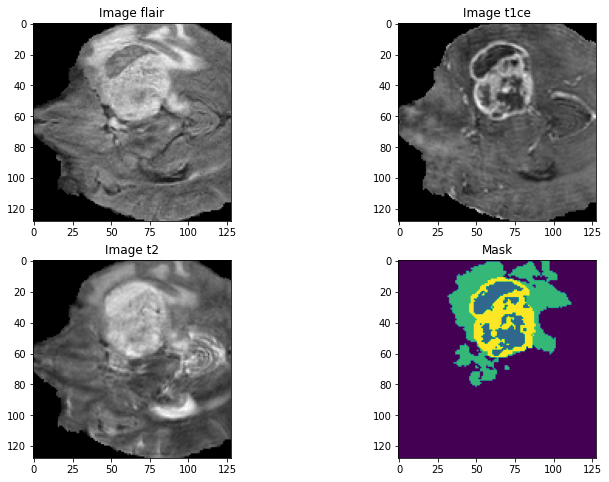

In [1]:
import os
import numpy as np
from custom_datagen import imageLoader
from tensorflow import keras
from matplotlib import pyplot as plt
import glob
import random
import segmentation_models_3D as sm

In [2]:
train_img_dir = "BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "BraTS2020_TrainingData/input_data_128/train/masks/"

In [3]:
img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

In [4]:
num_images = len(os.listdir(train_img_dir))

In [5]:
img_num = random.randint(0, num_images-1)
test_img = np.load(train_img_dir + img_list[img_num])
test_mask = np.load(train_mask_dir + msk_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

In [6]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Image flair')

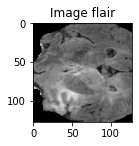

In [7]:
plt.subplot(221)
plt.imshow(test_img[:, :, n_slice, 0], cmap='gray')
plt.title('Image flair')

Text(0.5, 1.0, 'Image t1ce')

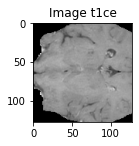

In [8]:
plt.subplot(222)
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')
plt.title('Image t1ce')

Text(0.5, 1.0, 'Image t2')

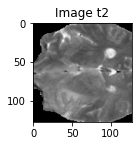

In [9]:
plt.subplot(223)
plt.imshow(test_img[:, :, n_slice, 2], cmap='gray')
plt.title('Image t2')

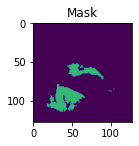

In [10]:
plt.subplot(224)
plt.imshow(test_mask[:, :, n_slice])
plt.title('Mask')
plt.show()

In [11]:
import pandas as pd

columns = ['0','1', '2', '3']
df = pd.DataFrame(columns=columns)
train_mask_list = sorted(glob.glob('BraTS2020_TrainingData/input_data_128/train/masks/*.npy'))
for img in range(len(train_mask_list)):
    print(img)
    temp_image=np.load(train_mask_list[img])
    temp_image = np.argmax(temp_image, axis=3)
    val, counts = np.unique(temp_image, return_counts=True)
    zipped = zip(columns, counts)
    conts_dict = dict(zipped)
    
    df = df.append(conts_dict, ignore_index=True)

label_0 = df['0'].sum()
label_1 = df['1'].sum()
label_2 = df['1'].sum()
label_3 = df['3'].sum()
total_labels = label_0 + label_1 + label_2 + label_3
n_classes = 4

# Class weights claculation: n_samples / (n_classes * n_samples_for_class)
wt0 = round((total_labels/(n_classes*label_0)), 2) #round to 2 decimals
wt1 = round((total_labels/(n_classes*label_1)), 2)
wt2 = round((total_labels/(n_classes*label_2)), 2)
wt3 = round((total_labels/(n_classes*label_3)), 2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257


In [12]:
train_img_dir = "BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "BraTS2020_TrainingData/input_data_128/train/masks/"

In [13]:
val_img_dir = "BraTS2020_TrainingData/input_data_128/val/images/"
val_mask_dir = "BraTS2020_TrainingData/input_data_128/val/masks/"

In [14]:
train_img_list = os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

In [15]:
val_img_list = os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

In [16]:
batch_size = 2

In [17]:
train_img_datagen = imageLoader(train_img_dir, train_img_list, train_mask_dir, train_mask_list, batch_size)

In [18]:
val_img_datagen = imageLoader(val_img_dir, val_img_list, val_mask_dir, val_mask_list, batch_size)

In [19]:
img, msk = train_img_datagen.__next__()

In [20]:
img_num = random.randint(0, img.shape[0]-1)
test_img = img[img_num]
test_mask = msk[img_num]
test_mask = np.argmax(test_mask, axis=3)

In [21]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Image flair')

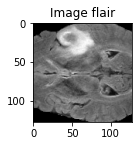

In [22]:
plt.subplot(221)
plt.imshow(test_img[:, :, n_slice, 0], cmap='gray')
plt.title('Image flair')

Text(0.5, 1.0, 'Image t1ce')

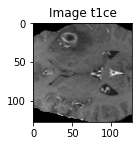

In [23]:
plt.subplot(222)
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')
plt.title('Image t1ce')

Text(0.5, 1.0, 'Image t2')

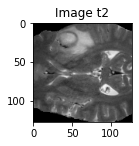

In [24]:
plt.subplot(223)
plt.imshow(test_img[:, :, n_slice, 2], cmap='gray')
plt.title('Image t2')

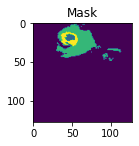

In [25]:
plt.subplot(224)
plt.imshow(test_mask[:, :, n_slice])
plt.title('Mask')
plt.show()

In [26]:
# Define loss, metrics and optimizer to be used for training
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25

In [27]:
from tensorflow import keras

dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)

In [28]:
steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

In [29]:
from simple_3d_unet import simple_unet_model

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 12 0                                            
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 128, 128, 128 1312        input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 128 0           conv3d[0][0]                     
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 128, 128, 128 6928        dropout[0][0]                    
______________________________________________________________________________________________

In [30]:
epo = int(input("Enter a Epoch number: "))
verbs = int(input("Enter the verbose number: "))

model = simple_unet_model(IMG_HEIGHT=128, 
                          IMG_WIDTH=128, 
                          IMG_DEPTH=128, 
                          IMG_CHANNELS=3, 
                          num_classes=4)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)

history = model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs= epo,
          verbose= verbs,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

model.save("Models/brats_3d_"+str(epo)+"_Epochs.hdf5")

Enter a Epoch number: 100
Enter the verbose number: 1
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 12 0                                            
__________________________________________________________________________________________________
conv3d_19 (Conv3D)              (None, 128, 128, 128 1312        input_2[0][0]                    
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 128, 128, 128 0           conv3d_19[0][0]                  
__________________________________________________________________________________________________
conv3d_20 (Conv3D)              (None, 128, 128, 128 6928        dropout_9[0][0]                  
______________________________________

129/129 [==============================] - 126s 873ms/step - loss: 0.9558 - accuracy: 0.8876 - iou_score: 0.1947 - val_loss: 0.9327 - val_accuracy: 0.9455 - val_iou_score: 0.2393
Epoch 2/100
129/129 [==============================] - 113s 873ms/step - loss: 0.9282 - accuracy: 0.9388 - iou_score: 0.2718 - val_loss: 0.9324 - val_accuracy: 0.8804 - val_iou_score: 0.3053
Epoch 3/100
129/129 [==============================] - 113s 873ms/step - loss: 0.9116 - accuracy: 0.9495 - iou_score: 0.3424 - val_loss: 0.9186 - val_accuracy: 0.9055 - val_iou_score: 0.3264
Epoch 4/100
129/129 [==============================] - 113s 873ms/step - loss: 0.8999 - accuracy: 0.9527 - iou_score: 0.3694 - val_loss: 0.9066 - val_accuracy: 0.9142 - val_iou_score: 0.3776
Epoch 5/100
129/129 [==============================] - 113s 873ms/step - loss: 0.8902 - accuracy: 0.9532 - iou_score: 0.4096 - val_loss: 0.9051 - val_accuracy: 0.8973 - val_iou_score: 0.3808
Epoch 6/100
129/129 [==============================] - 11

Epoch 44/100
129/129 [==============================] - 113s 878ms/step - loss: 0.8018 - accuracy: 0.9847 - iou_score: 0.7162 - val_loss: 0.8273 - val_accuracy: 0.9759 - val_iou_score: 0.6223
Epoch 45/100
129/129 [==============================] - 112s 872ms/step - loss: 0.8002 - accuracy: 0.9853 - iou_score: 0.7232 - val_loss: 0.8206 - val_accuracy: 0.9799 - val_iou_score: 0.6457
Epoch 46/100
129/129 [==============================] - 112s 871ms/step - loss: 0.7990 - accuracy: 0.9855 - iou_score: 0.7287 - val_loss: 0.8206 - val_accuracy: 0.9797 - val_iou_score: 0.6472
Epoch 47/100
129/129 [==============================] - 113s 874ms/step - loss: 0.7980 - accuracy: 0.9861 - iou_score: 0.7323 - val_loss: 0.8239 - val_accuracy: 0.9788 - val_iou_score: 0.6349
Epoch 48/100
129/129 [==============================] - 112s 872ms/step - loss: 0.7985 - accuracy: 0.9858 - iou_score: 0.7301 - val_loss: 0.8253 - val_accuracy: 0.9766 - val_iou_score: 0.6317
Epoch 49/100
129/129 [==================

Epoch 87/100
129/129 [==============================] - 112s 872ms/step - loss: 0.7833 - accuracy: 0.9904 - iou_score: 0.8014 - val_loss: 0.8196 - val_accuracy: 0.9761 - val_iou_score: 0.6561
Epoch 88/100
129/129 [==============================] - 112s 873ms/step - loss: 0.7845 - accuracy: 0.9902 - iou_score: 0.7957 - val_loss: 0.8217 - val_accuracy: 0.9750 - val_iou_score: 0.6487
Epoch 89/100
129/129 [==============================] - 113s 873ms/step - loss: 0.7846 - accuracy: 0.9901 - iou_score: 0.7946 - val_loss: 0.8181 - val_accuracy: 0.9776 - val_iou_score: 0.6613
Epoch 90/100
129/129 [==============================] - 112s 873ms/step - loss: 0.7834 - accuracy: 0.9904 - iou_score: 0.8006 - val_loss: 0.8179 - val_accuracy: 0.9788 - val_iou_score: 0.6619
Epoch 91/100
129/129 [==============================] - 113s 874ms/step - loss: 0.7835 - accuracy: 0.9904 - iou_score: 0.8003 - val_loss: 0.8162 - val_accuracy: 0.9801 - val_iou_score: 0.6668
Epoch 92/100
129/129 [==================

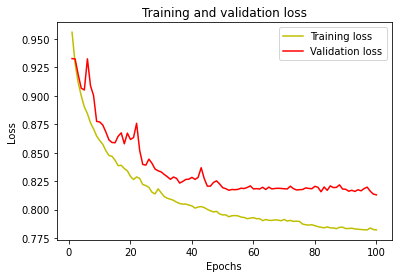

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

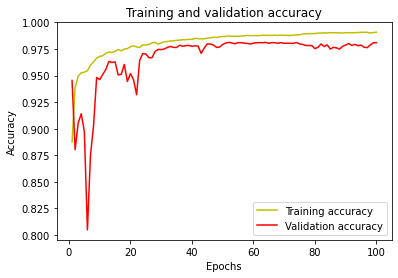

In [33]:
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
from tensorflow.keras.models import load_model

In [36]:
my_model = load_model("Models/brats2020_3d_Unet_100_Epochs.hdf5", custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                      'iou_score':sm.metrics.IOUScore(threshold=0.5)})

In [37]:
epo_again = int(input("Enter a Epoch number: "))
verbs_again = int(input("Enter the verbose number: "))

history2 = my_model.fit(train_img_datagen, steps_per_epoch=steps_per_epoch, epochs=epo_again, verbose=verbs_again, validation_data=val_img_datagen, validation_steps=val_steps_per_epoch,)

Enter a Epoch number: 1
Enter the verbose number: 1
129/129 [==============================] - 114s 875ms/step - loss: 0.7818 - accuracy: 0.9910 - iou_score: 0.8087 - val_loss: 0.8154 - val_accuracy: 0.9798 - val_iou_score: 0.6702


In [38]:
my_model = load_model("Models/brats2020_3d_Unet_100_Epochs.hdf5", compile=False)

In [39]:
from keras.metrics import MeanIoU

In [40]:
batch_size = 8
test_img_datagen = imageLoader(val_img_dir, val_img_list, val_mask_dir, val_mask_list, batch_size)

In [41]:
test_image_batch, test_mask_batch = test_img_datagen.__next__()

In [42]:
test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

In [43]:
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print(f"Mean IoU = {IOU_keras.result().numpy()}")

Mean IoU = 0.8396603465080261


In [44]:
img_num = int(input("Select the image number: ")) # 41

test_img = np.load("BraTS2020_TrainingData/input_data_128/val/images/image_"+str(img_num)+".npy")

test_mask = np.load("BraTS2020_TrainingData/input_data_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax = np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax = np.argmax(test_prediction, axis=4)[0, :, :, :]

Select the image number: 41


In [45]:
from matplotlib import pyplot as plt
import random

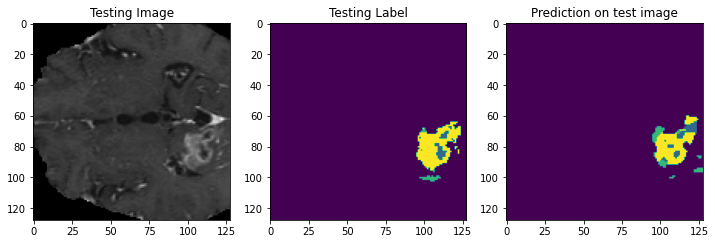

In [46]:
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()